In [52]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


**Задание 1**
Загрузить файл в Pandas

In [3]:
url='https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Задание 2**
Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [45]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [8]:
df.median()

<ipython-input-8-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [18]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


**Задание 3**
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

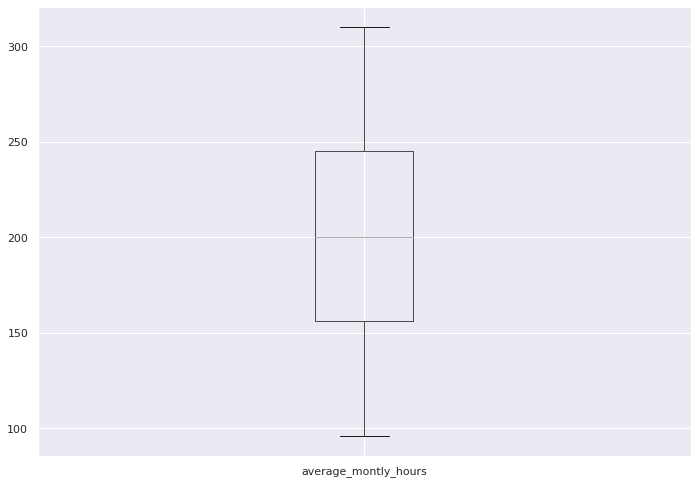

In [49]:
#Построим ящики с усами, чтобы убедиться, что нет выбросов
df.boxplot(column=['average_montly_hours'])

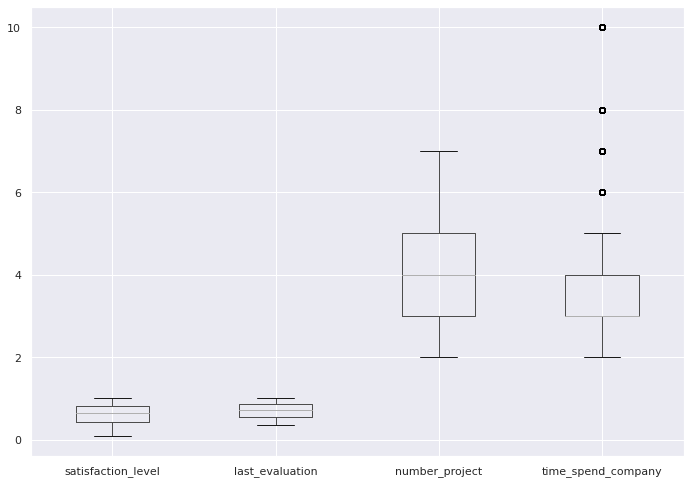

In [50]:
df.boxplot(column=['satisfaction_level',	'last_evaluation',	'number_project',	'time_spend_company'])

In [55]:
# Так как в переменной со стажем работы в компании нашлись выбросы, предлагаю их убрать, чтобы проанализировать картину в среднем

q1 = df['time_spend_company'].quantile(0.25)
q3 = df['time_spend_company'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['time_spend_company'].between(lower_bound, upper_bound, inclusive=True)]

<ipython-input-55-2821039d966f>:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  remove_outliers = df[df['time_spend_company'].between(lower_bound, upper_bound, inclusive=True)]


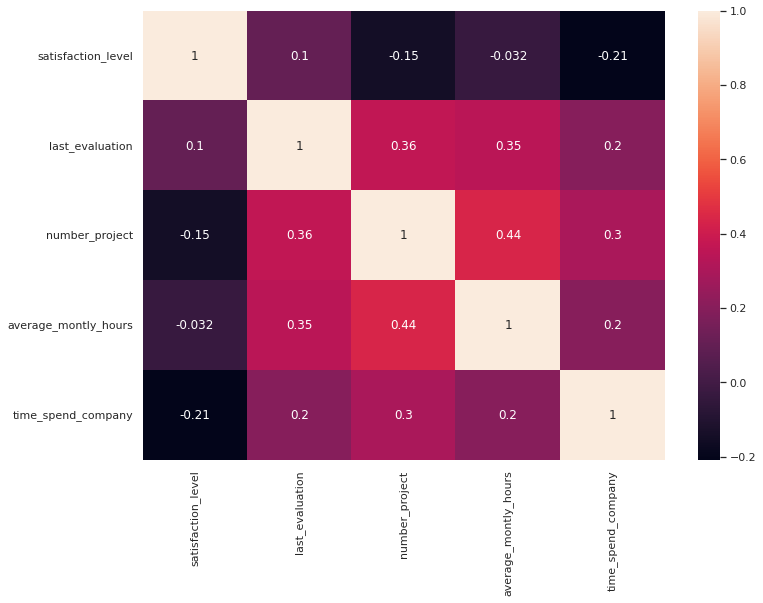

In [53]:
#Рассчитаю корреляционную матрицу Пирсена для количественных переменных
cor_matrix = remove_outliers[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company']]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(cor_matrix.corr(), annot=True)

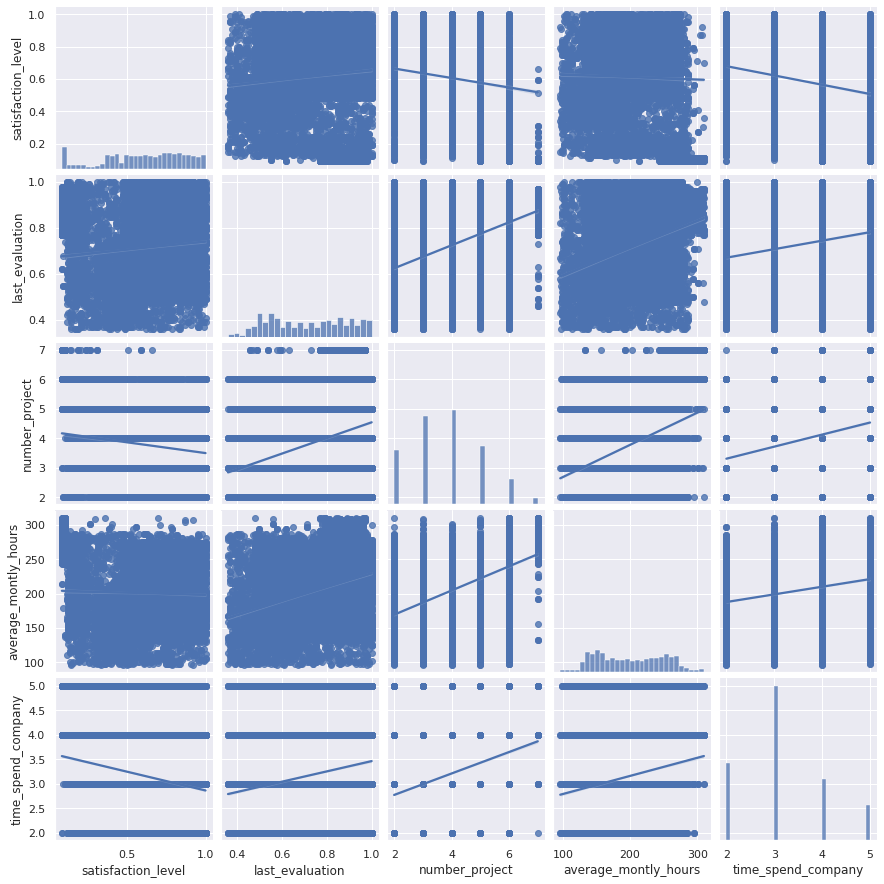

In [54]:
# Визуализирую корреляционную матрицу
sns.pairplot(cor_matrix, kind='reg')

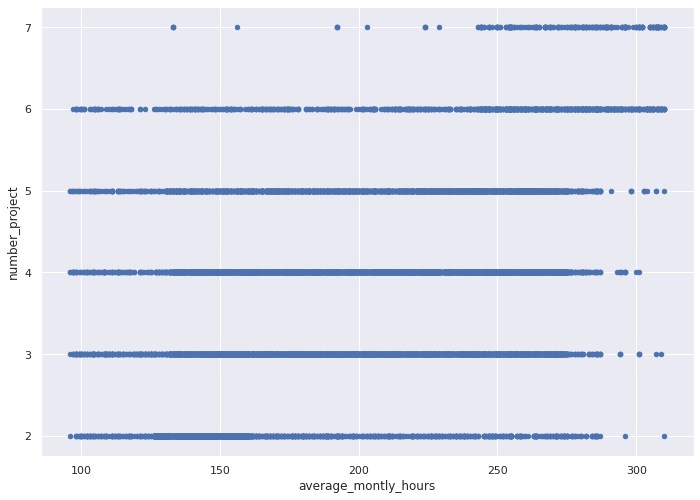

In [30]:
# Наибольший коэффициент Пирсена (0,44) получился между Среднем количеством часов на рабочем месте в месяц и Количеством проектов, выполненных за время работы
# визуализируем отдельно эту взаимосвязь
df.plot(kind='scatter', x='average_montly_hours', y='number_project')

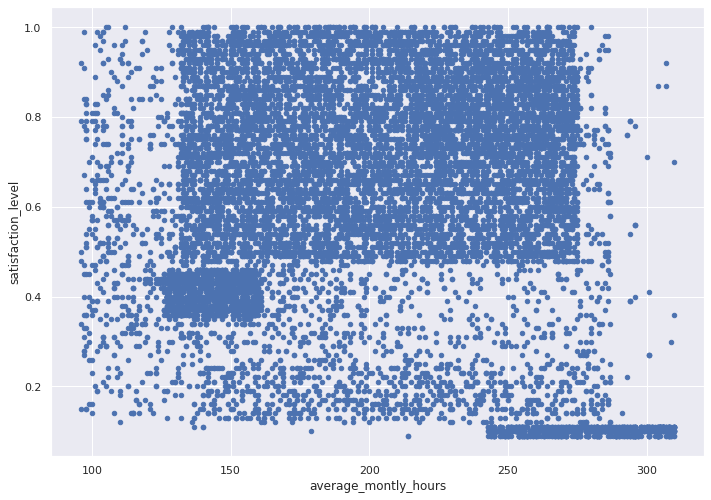

In [56]:
# Наименее скореллированные переменные (-0,032) - это Уровень удовлетворенности работой и Среднее количество часов на рабочем месте в месяц
# Визуализируем эту взаимосвязь
df.plot(kind='scatter', x='average_montly_hours', y='satisfaction_level')
# Исходя из графика, я бы тут все-таки выделила некую взаимосвязь или инсайт - четко видно, 
# что те, у кого самый маленький уровень удовлетворенности в среднем работали больше часов, чем остальные

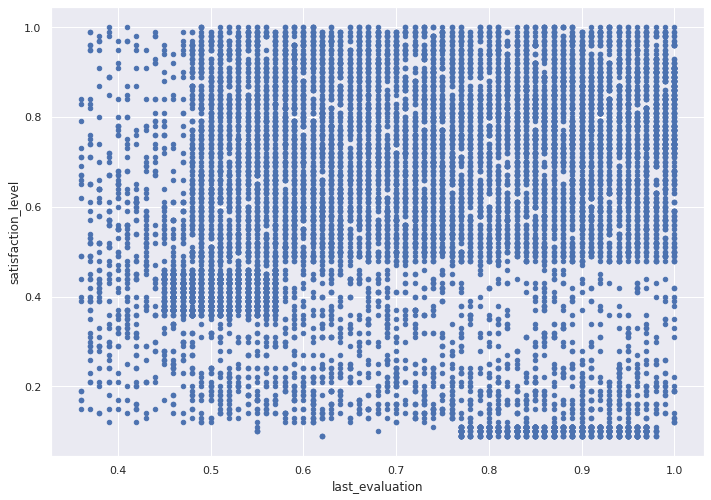

In [61]:
# На втором месте наименее скореллированная пара меременных (0,1) - это Уровень удовлетворенности работой и Время с момента последней оценки в годах
# Визуализируем эту взаимосвязь
df.plot(kind='scatter', x='last_evaluation', y='satisfaction_level')
# Интрересно, что тут так же наблюдается похожая связь  и можно вытащить инсайт: 
# те, у кого самый маленький уровень удовлетворенности в среднем ставили свою последнюю оценку более продолжительное время назад, чем остальные,
# то есть можно сделать гипотезу, что сотрудники, кто крайне не удовлетворен работой имеют тенденцию реже ставить оценку своей удовлетворенности, (видимо, пропускают опросы)

**Задание 4**
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [29]:
#Для того, чтобы посчитать количество, возьму просто любой столбец
df.groupby('department').count()['satisfaction_level']

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

**Задание 5**
Показать распределение сотрудников по зарплатам.

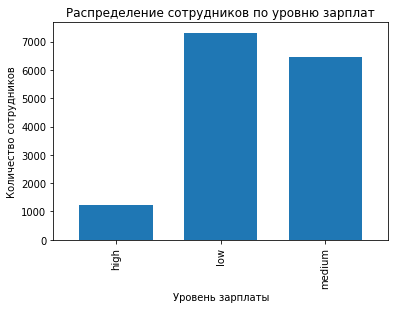

In [53]:
grouppedby_salaries = df.groupby('salary').count()['satisfaction_level']
grouppedby_salaries.plot(kind='bar', width=0.7, title='Распределение сотрудников по уровню зарплат', xlabel='Уровень зарплаты', ylabel='Количество сотрудников')

**Задание 6**
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

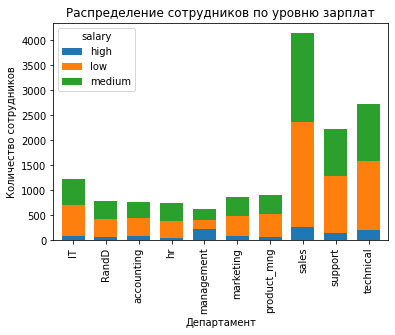

In [59]:
grouppedby_dep = df.pivot_table(index = 'department', columns = 'salary', values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)
grouppedby_dep.plot(kind='bar', width=0.7, title='Распределение сотрудников по уровню зарплат', xlabel='Департамент', ylabel='Количество сотрудников', stacked=True)

**Задание 7**
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [72]:
hihg_salary = df['average_montly_hours'].loc[df['salary'] == 'high']
low_salary = df['average_montly_hours'].loc[df['salary'] == 'low']
#с помощью Одновыборочного Т-test определим отличются ли результаты
t_value, p_value = stats.ttest_ind(hihg_salary, low_salary)
print('t_value', t_value, 'p_value', p_value)

t_value -0.7288680398062308 p_value 0.4661023478267259


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


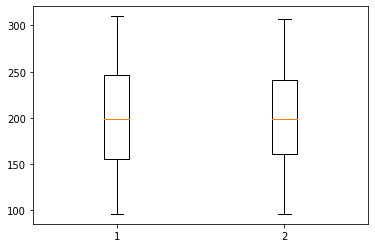

In [76]:
plot = plt.boxplot(x=[low_salary,hihg_salary])

**ВЫВОД:** Эту гипотеза не подтверждается, так как p-value >0,05, а значит мы не можем отклонить нулевую гипотезу, что выборки не отличаются. Судя по боксплотам наборы данных правктически одинаковые. **Так что размер оклада, вероятно, не влияет на количетсво часов, проведенных на работе.**

**Задание 8**
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

●Доля сотрудников с повышением за последние 5 лет

●Средняя степень удовлетворенности

●Среднее количество проектов

In [45]:
retired = df.loc[df['left'] == 1]
remaining = df.loc[df['left'] == 0]

#Доля сотрудников с повышением за последние 5 лет
retired_qty = retired['satisfaction_level'].count() #всего уволившихся сотрудников
remaining_qty = remaining['satisfaction_level'].count() #всего оставшихся сотрудников

promo_retired_qty = retired['satisfaction_level'].loc[retired['promotion_last_5years'] == 1].count() #всего сотрудников с повышением среди уволившихся
promo_remaining_qty = remaining['satisfaction_level'].loc[remaining['promotion_last_5years'] == 1].count()  #всего сотрудников с повышением среди оставшихся

share_promo_retired = (promo_retired_qty/retired_qty)*100
share_promo_remaining = (promo_remaining_qty/remaining_qty)*100

print(f'Доля сотрудников с повышением за последние 5 лет среди уволившихся: {share_promo_retired:.1f}%')
print(f'Доля сотрудников с повышением за последние 5 лет среди оставшихся: {share_promo_remaining:.1f}%')

Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.5%
Доля сотрудников с повышением за последние 5 лет среди оставшихся: 2.6%


In [48]:
#Средняя степень удовлетворенности
mean_satisf_retired = retired['satisfaction_level'].mean()
mean_satisf_remaining = remaining['satisfaction_level'].mean()

print(f'Средняя степень удовлетворенности среди уволившихся: {mean_satisf_retired:.2f}')
print(f'Средняя степень удовлетворенности среди оставшихся: {mean_satisf_remaining:.2f}')

Средняя степень удовлетворенности среди уволившихся: 0.44
Средняя степень удовлетворенности среди оставшихся: 0.67


In [51]:
#Среднее количество проектов
mean_projects_retired = retired['number_project'].mean()
mean_projects_remaining = remaining['number_project'].mean()

print(f'Среднее количество проектов среди уволившихся: {mean_projects_retired:.2f}')
print(f'Среднее количество проектов среди оставшихся: {mean_projects_remaining:.2f}')

Среднее количество проектов среди уволившихся: 3.86
Среднее количество проектов среди оставшихся: 3.79
